Imports

In [1]:
import numpy as np
from helpers import create_band_matrix,create_forcing_matrix,create_graph
from matrix_algorithms import solve_jacobi,solve_gauss_seidel,solve_l_u, OutputSolution
from app_types import Config
import os

In [2]:
# Glocal variables & config

OUTPUT_DOCS_PATH="../docs"

if not os.path.exists(OUTPUT_DOCS_PATH):
    os.makedirs(OUTPUT_DOCS_PATH)


Task A

In [3]:

index = 197839

thrid_digit = index // 1000 % 10 # 3rd digit of index
fourth_digit = index // 100 % 10 # 4th digit of index

before_last = index // 10 % 10 # before last digit of index
last_digit = index % 10 # last digit of index

a1 = 5 + fourth_digit# a1 = 5 + 4th digit of index
a2 = a3 = -1 

N = 1200 + 10 * before_last + last_digit

A = create_band_matrix(a1,a2,a3, N) 
b = create_forcing_matrix(N, thrid_digit + 1)

print(A)
print(b)


[[13 -1 -1 ...  0  0  0]
 [-1 13 -1 ...  0  0  0]
 [-1 -1 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 13 -1 -1]
 [ 0  0  0 ... -1 13 -1]
 [ 0  0  0 ... -1 -1 13]]
[[ 0.98935825]
 [ 0.91794788]
 [ 0.3781055 ]
 ...
 [ 0.96749073]
 [-0.72202085]
 [-0.69618518]]


Task B

In [4]:
jacobi:OutputSolution = solve_jacobi(A, b)
print(f"Jacobi iterations: {jacobi.iterations}, time: {jacobi.time}, residual norm: {jacobi.errors[-1]}")

gauss:OutputSolution = solve_gauss_seidel(A, b)
print(f"Gauss iterations: {gauss.iterations}, time: {gauss.time}, residual norm: {gauss.errors[-1]}")

l_u_solution: OutputSolution = solve_l_u(A, b)
print(f"Time: {l_u_solution.time}, residual norm: {l_u_solution.errors[-1]}")

config = Config(
  x_label="Iterations",
  y_label="Residual Norm",
  title="Gauss-Seidel vs Jacobi Error Convergence",
  path=f"{OUTPUT_DOCS_PATH}/error_covergence.png",
  plot= [[gauss.errors,"Gauss-Seidel Error"], [jacobi.errors,"Jacobi Error"]],
  axhline=[[1e-9,"Convergence Threshold"]],
  figsize=(12, 6),
)


create_graph(config)

Jacobi iterations: 18, time: 0.19300031661987305, residual norm: 9.43725544335278e-10
Gauss iterations: 14, time: 0.2645721435546875, residual norm: 3.340701474008343e-10


KeyboardInterrupt: 

Task C

In [5]:
# change A matrix parameters
A = create_band_matrix(3,-1,-1, N) 


jacobi:OutputSolution = solve_jacobi(A, b)
print(f"Jacobi iterations: {jacobi.iterations}, time: {jacobi.time}, residual norm: {jacobi.errors[-1]}, coverage: {'Yes' if jacobi.does_converge else 'No'}")

gauss:OutputSolution = solve_gauss_seidel(A, b)
print(f"Gauss iterations: {gauss.iterations}, time: {gauss.time}, residual norm: {gauss.errors[-1]}, coverage: {'Yes' if gauss.does_converge else 'No'}")

config = Config(
  x_label="Iterations",
  y_label="Residual Norm",
  title="Gauss-Seidel vs Jacobi Error Convergence",
  path=f"{OUTPUT_DOCS_PATH}/error_covergence_alternative.png",
  plot= [[gauss.errors,"Gauss-Seidel Error"], [jacobi.errors,"Jacobi Error"]],
  axhline=[[1e9,"Divergence threshold"]],
  figsize=(12, 6),
)
create_graph(config)

Jacobi iterations: 68, time: 0.5910108089447021, residual norm: 1063986320.1875222, coverage: No


KeyboardInterrupt: 

Task D

In [11]:
A = create_band_matrix(3,-1,-1, N) 

l_u_solution: OutputSolution = solve_l_u(A, b)

print(f"Time: {l_u_solution.time}, residual norm: {l_u_solution.errors[-1]}")



Time: 451.8825809955597, residual norm: 8.897384100549733e-11


Task E

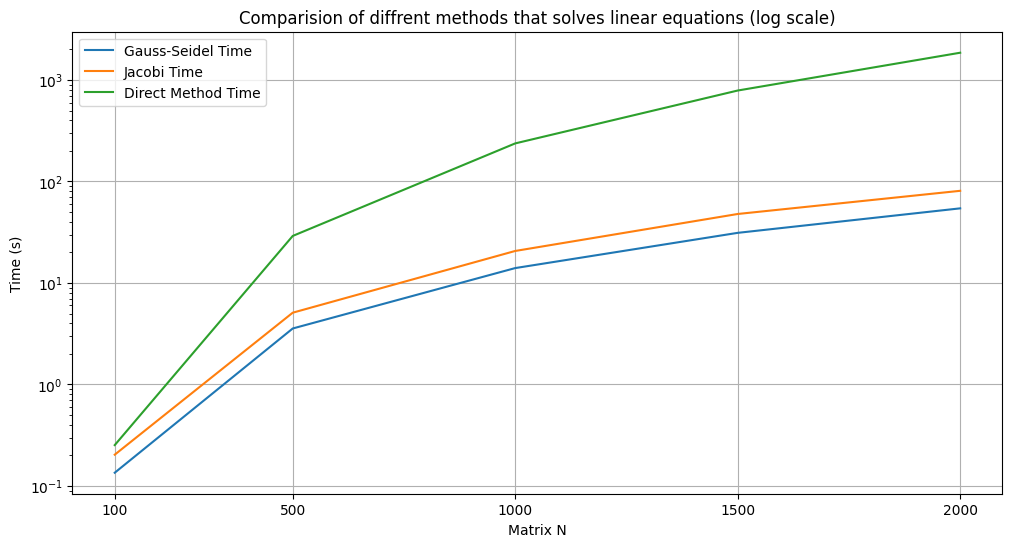

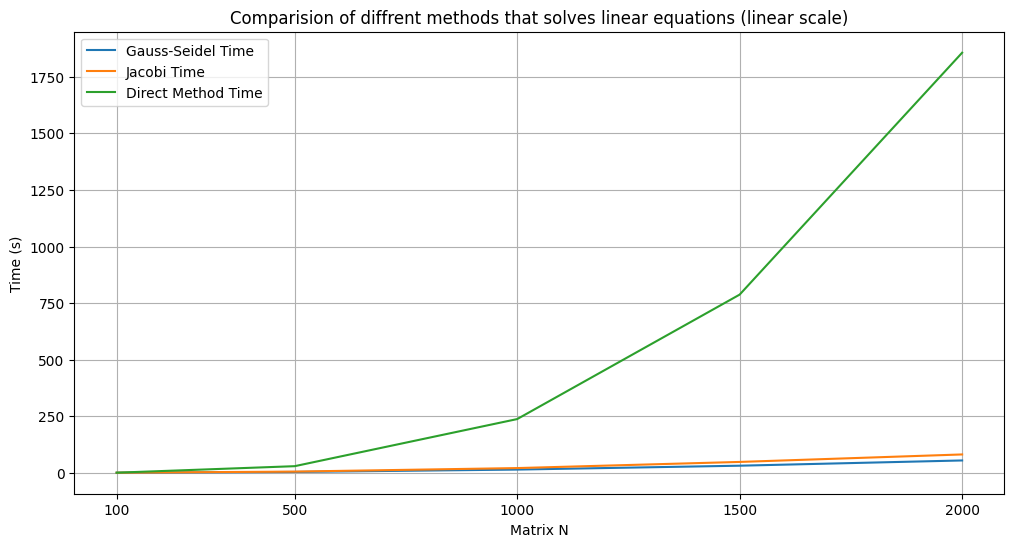

In [13]:

Matrix_sizes = [100, 500,1000,1500, 2000]

jacobi_time = []
gauss_time = []
direct_method = []

for size in Matrix_sizes:
  A = create_band_matrix(a1,a2,a3, size) 
  b = create_forcing_matrix(size, thrid_digit + 1)
  
  jacobi:OutputSolution = solve_jacobi(A, b)
  gauss:OutputSolution = solve_gauss_seidel(A, b)
  l_u_solution: OutputSolution = solve_l_u(A, b)
  
  jacobi_time.append(jacobi.time)
  gauss_time.append(gauss.time)
  direct_method.append(l_u_solution.time)
  

plot_data = [[Matrix_sizes,gauss_time,"Gauss-Seidel Time"], [Matrix_sizes,jacobi_time,"Jacobi Time"], [Matrix_sizes,direct_method,"Direct Method Time"]]

configLog = Config(
  x_label="Matrix N",
  y_label="Time (s)",
  title="Comparision of diffrent methods that solves linear equations (log scale)",
  path=f"{OUTPUT_DOCS_PATH}/time_comparison_log.png",
  plot=plot_data,
  log_y_axis=True,
  has_x_axis=True,
  figsize=(12, 6),
)
create_graph(configLog)

configLinear = Config(
  x_label="Matrix N",
  y_label="Time (s)",
  title="Comparision of diffrent methods that solves linear equations (linear scale)",
  path=f"{OUTPUT_DOCS_PATH}/time_comparison_linear.png",
  plot=plot_data,
  log_y_axis=False,
  has_x_axis=True,
  figsize=(12, 6),
)
create_graph(configLinear)

